In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [105]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan",
              "SecuritiesAccount","CDAccount","Online","CreditCard"]
bank_df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### Study the data distribution in each attribute, share your findings.

In [106]:
bank_df.describe().T
# Observation: Min experience is showing negative values, which is incorrect, so we have to clean that column

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [107]:
(bank_df[['Experience']] < 0).sum()

Experience    52
dtype: int64

In [108]:
bank_df.isna().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [109]:
bank_df[bank_df < 0] = np.nan

In [110]:
(bank_df[['Experience']] < 0).sum()

Experience    0
dtype: int64

In [111]:
bank_df.isna().sum()

ID                    0
Age                   0
Experience           52
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
dtype: int64

In [112]:
bank_df.median()

ID                    2500.5
Age                     45.0
Experience              20.0
Income                  64.0
ZIPCode              93437.0
Family                   2.0
CCAvg                    1.5
Education                2.0
Mortgage                 0.0
PersonalLoan             0.0
SecuritiesAccount        0.0
CDAccount                0.0
Online                   1.0
CreditCard               0.0
dtype: float64

In [113]:
median = bank_df.median()
bank_df.fillna(median, inplace = True)

In [114]:
bank_df.isna().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

### Get the target column distribution. Your comments

In [115]:
bank_df['PersonalLoan'].value_counts()
# Observation: 480 people have opted for loan which is 9.6% of the total record count

0    4520
1     480
Name: PersonalLoan, dtype: int64

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


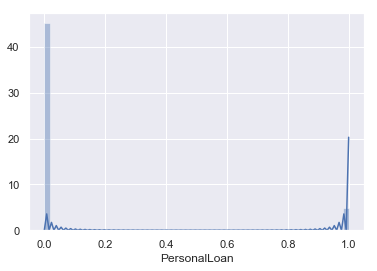

In [116]:
sns.distplot(bank_df['PersonalLoan'])

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


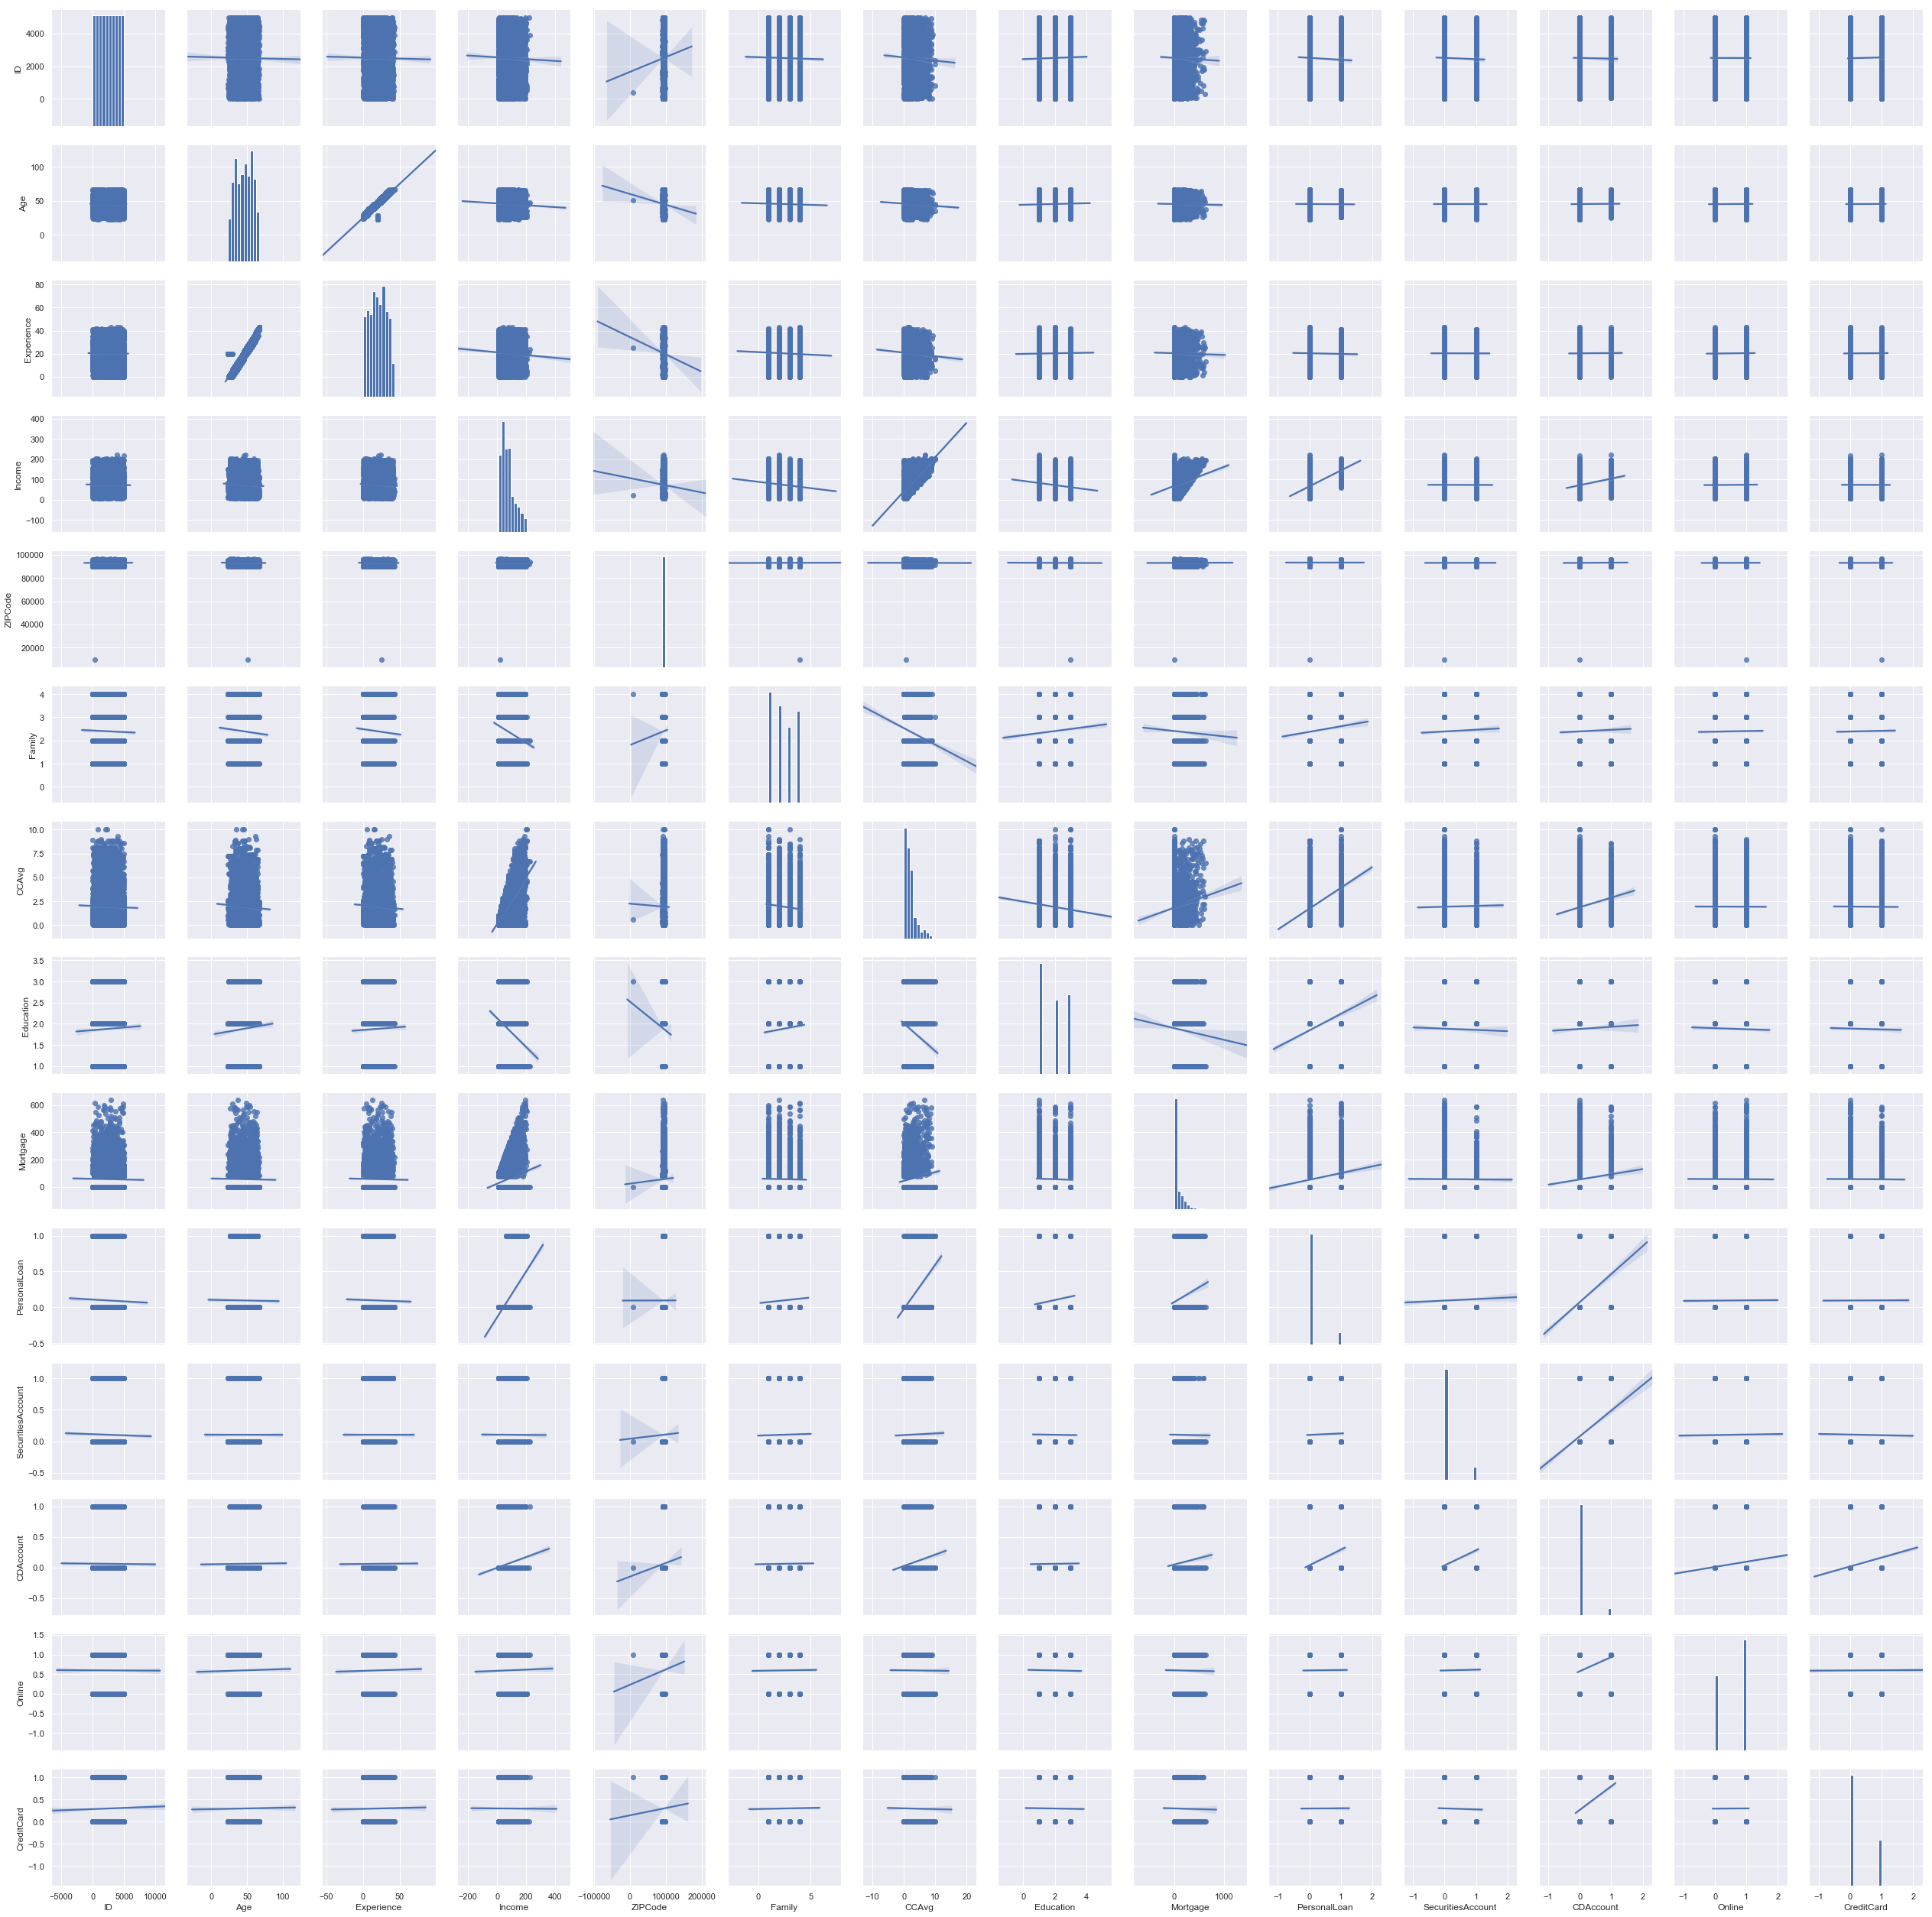

In [117]:
sns.pairplot(bank_df[['ID','Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']], kind="reg")

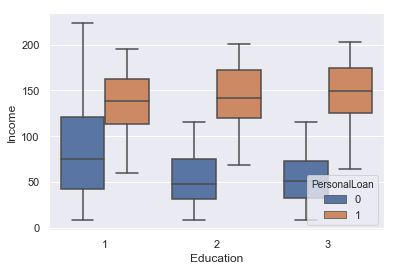

In [118]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=bank_df)

# Observation:

# The box plots show that those with education level 1 have higher incomes. 
# But customers who go for personal loans have the same income distribution regardless of the education level.

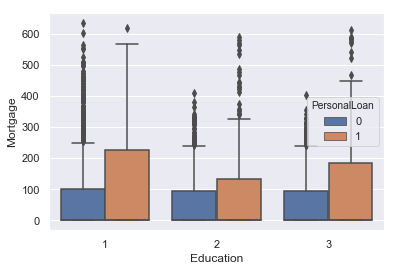

In [120]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=bank_df)

# Observation:

# Customers who taken loan also have higher mortgages.

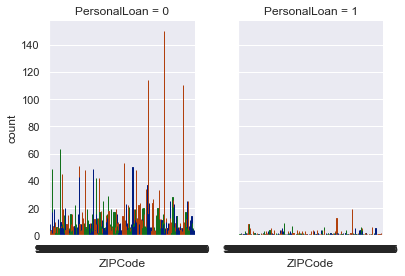

In [121]:
sns.catplot(x="ZIPCode", hue="PersonalLoan", col="PersonalLoan", data=bank_df, kind="count", height=4, aspect=.7, edgecolor=sns.color_palette("dark", 3))

In [122]:
zipcode_top5 = bank_df[bank_df.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

# Observation:

# Top 5 locations who appled for personal loan

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

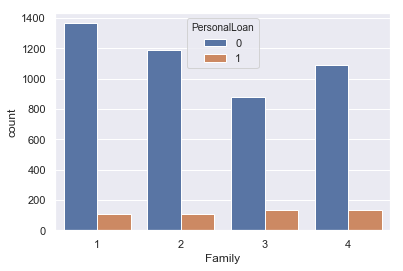

In [124]:
sns.countplot(x="Family", data=bank_df,hue="PersonalLoan")

In [126]:
familysize_no = np.mean( bank_df[bank_df.PersonalLoan == 0]['Family'] )
familysize_no

2.3734513274336284

In [127]:
familysize_yes = np.mean( bank_df[bank_df.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

In [ ]:
# Observation: Family size seems to have no impact on the decision to take a Personal Loan

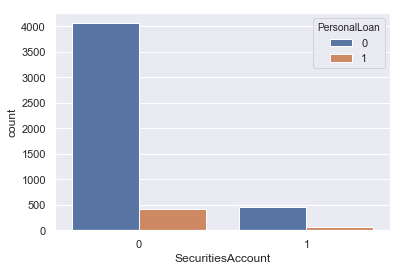

In [129]:
sns.countplot(x="SecuritiesAccount", data=bank_df,hue="PersonalLoan")

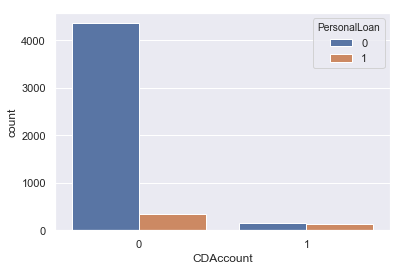

In [130]:
sns.countplot(x="CDAccount", data=bank_df,hue="PersonalLoan")

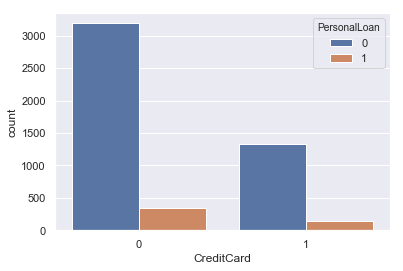

In [131]:
sns.countplot(x="CreditCard", data=bank_df,hue="PersonalLoan")

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


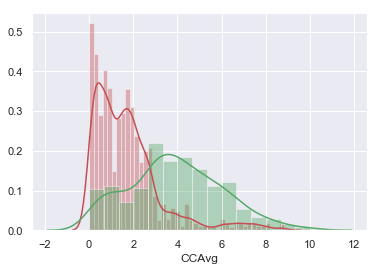

In [133]:
sns.distplot( bank_df[bank_df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( bank_df[bank_df.PersonalLoan == 1]['CCAvg'], color = 'g')

In [ ]:
# Observation: Customers who have taken personal loan have higher credit card average than those who did not take. 
# So high credit card average seems to be good indicator of whether or not a customer will take a personal loan.

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


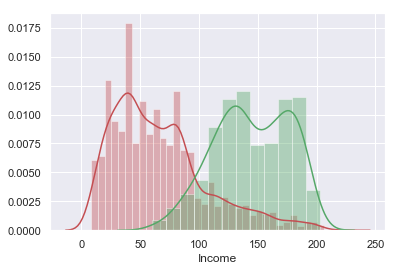

In [135]:
sns.distplot( bank_df[bank_df.PersonalLoan == 0]['Income'], color = 'r')
sns.distplot( bank_df[bank_df.PersonalLoan == 1]['Income'], color = 'g')

# Observation: People with higher Income seem to have higher likelihood of opting for Personal Loan

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


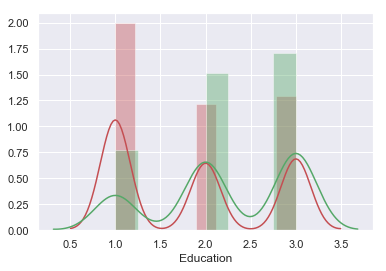

In [137]:
sns.distplot( bank_df[bank_df.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( bank_df[bank_df.PersonalLoan == 1]['Education'], color = 'g')

# Observation: People with higher Education seem to have higher likelihood of opting for Personal Loan

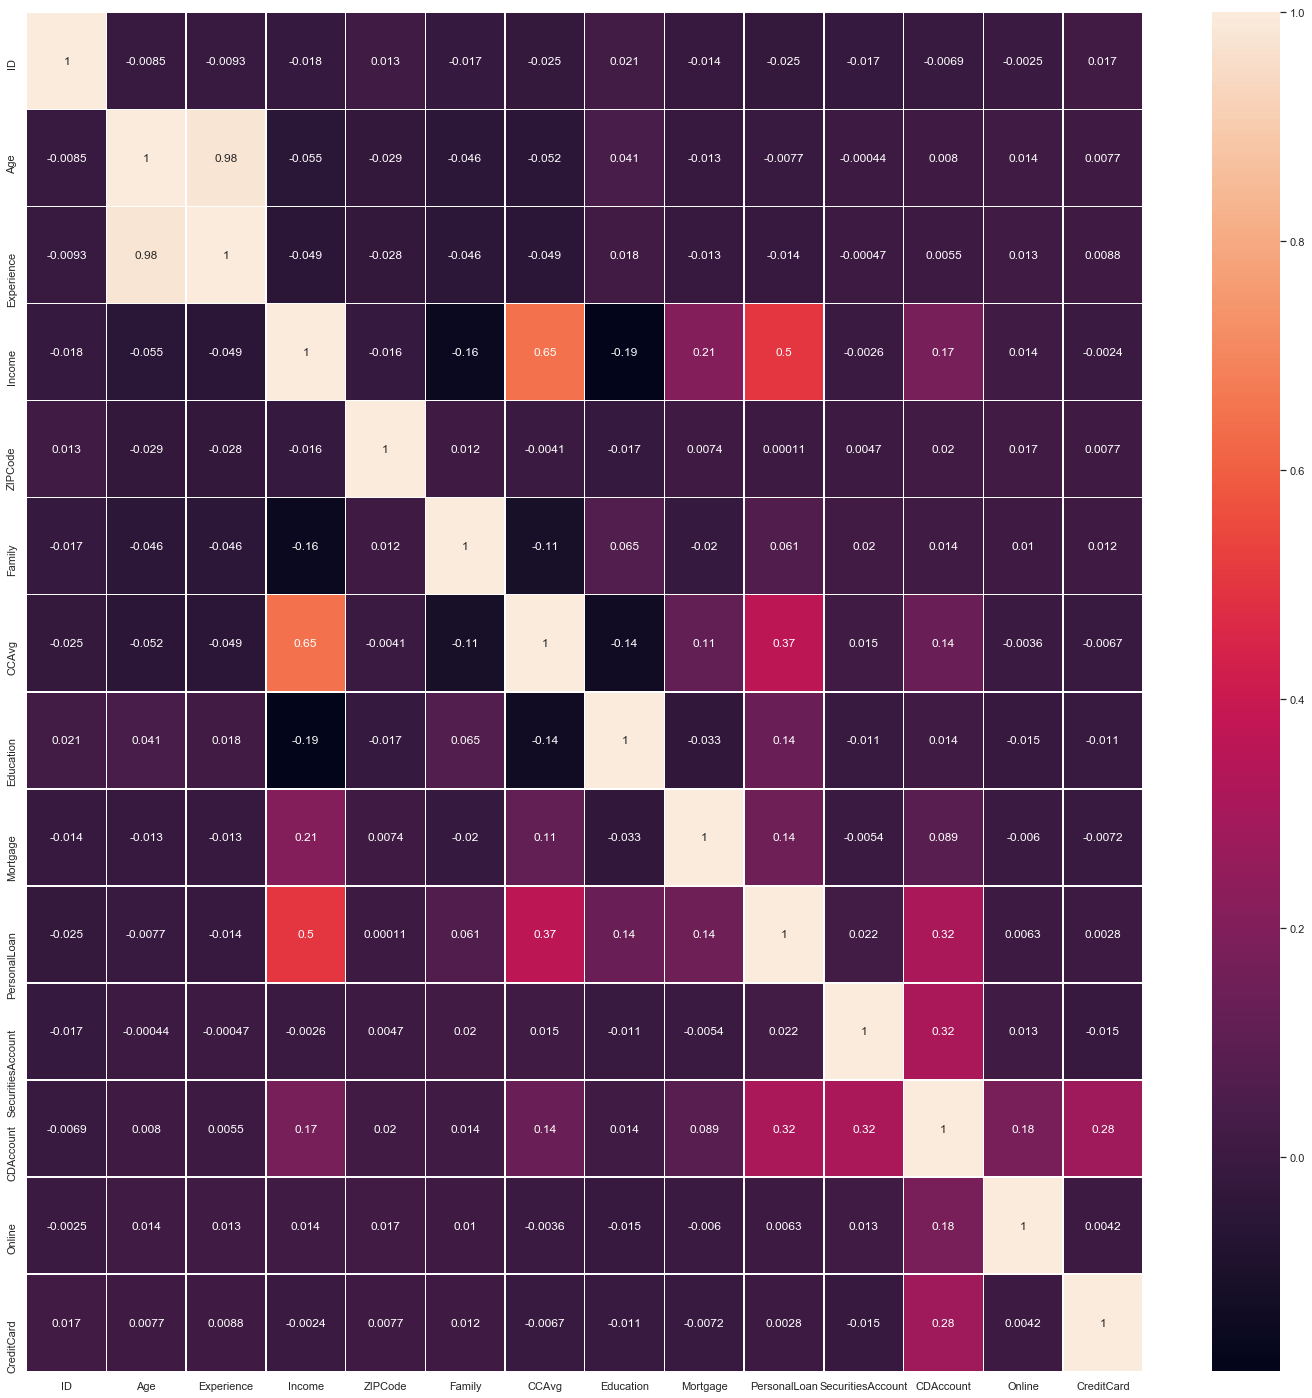

In [144]:
corr = bank_df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, linewidths=.5, annot=True)

# Observation:

# 1) Age and Experoence is highly correlated
# 2) Income and CCAvg also correlated
# 3) Personal Loan and Income also correlated

### Split the data into training and test set in the ratio of 70:30 respectively

In [145]:
X = bank_df.drop('PersonalLoan', axis = 1)
y = bank_df.pop('PersonalLoan')

In [174]:
X_std = StandardScaler().fit_transform(X)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

### Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.908


### Confusion Matrix for Logistic Regression

In [156]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1319   32]
 [ 106   43]]


### K-NN model

In [166]:
KNN_3 = KNeighborsClassifier(n_neighbors= 3, weights = 'distance', metric='hamming')
KNN_5 = KNeighborsClassifier(n_neighbors= 5, weights = 'distance', metric='hamming')
KNN_9 = KNeighborsClassifier(n_neighbors= 9, weights = 'distance', metric='hamming')

# weights :  optional (default = ‘uniform’)
# weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors 
#             of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [167]:
KNN_3.fit(X_train, y_train)
KNN_5.fit(X_train, y_train)
KNN_9.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

In [168]:
pred_labels_3 = KNN_3.predict(X_test)
acc_3 = accuracy_score(y_test, pred_labels_3)
print('KNN_3 Accuracy Score: ', acc_3)

pred_labels_5 = KNN_5.predict(X_test)
acc_5 = accuracy_score(y_test, pred_labels_5)
print('KNN_5 Accuracy Score: ', acc_5)

pred_labels_9 = KNN_9.predict(X_test)
acc_9 = accuracy_score(y_test, pred_labels_9)
print('KNN_9 Accuracy Score: ', acc_9)

KNN_3 Accuracy Score:  0.9093333333333333
KNN_5 Accuracy Score:  0.9066666666666666
KNN_9 Accuracy Score:  0.9013333333333333


### Confusion Matrix for K-NN model

In [163]:
print(metrics.confusion_matrix(y_test, pred_labels_3))
print(metrics.confusion_matrix(y_test, pred_labels_5))
print(metrics.confusion_matrix(y_test, pred_labels_9))

[[1341   10]
 [ 126   23]]
[[1346    5]
 [ 135   14]]
[[1346    5]
 [ 143    6]]


### Naive Bayes model

In [171]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
print(model3)

GaussianNB(priors=None)


In [152]:
expected = y_test
predicted = model.predict(X_test)

In [153]:
accuracy_test = accuracy_score(expected, predicted)
print(accuracy_test)

0.8826666666666667


### Confusion Matrix for Naive Bayes model

In [154]:
print(metrics.confusion_matrix(expected, predicted))

[[1239  112]
 [  64   85]]


### Give your reasoning on which is the best model in this case and why it performs better

### KFold Cross Validation

In [172]:
models = []
models.append(('LogisticRegression', model1))
models.append(('K-NN', KNN_3))
models.append(('NaiveBayes', model3))

LogisticRegression: 0.950800 (0.006885)
K-NN: 0.908440 (0.006679)
NaiveBayes: 0.882920 (0.010969)


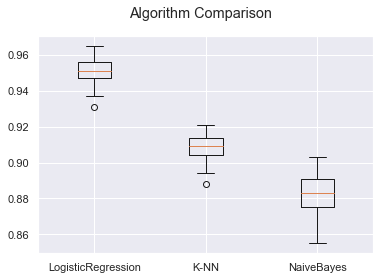

In [179]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.RepeatedKFold(n_splits=5,n_repeats=10,random_state=1)
#	kfold = model_selection.KFold(n_splits=5,random_state=1)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [176]:
# Observation: The Logistic Regression model performs the best as it delivers the highest score (0.950800), 
# lowest bias error (1-0.950800) and low standard deviation